## 省会设置5个核心能源点

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
 import re

## 特征提取

In [3]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]") #  
city_location = {}
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info: continue
        
    city_name, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city_name] = [long, lat]

In [4]:
city_location

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '西藏': [91.11, 29.97],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

In [5]:
import math

In [6]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [7]:
geo_distance(city_location['上海'], city_location['杭州'])

163.0760821403945

In [8]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = 'Noto Sans CJK JP'
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [9]:
import networkx as nx
city_graph = nx.Graph()

In [10]:
city_graph.add_nodes_from(list(city_location.keys()))

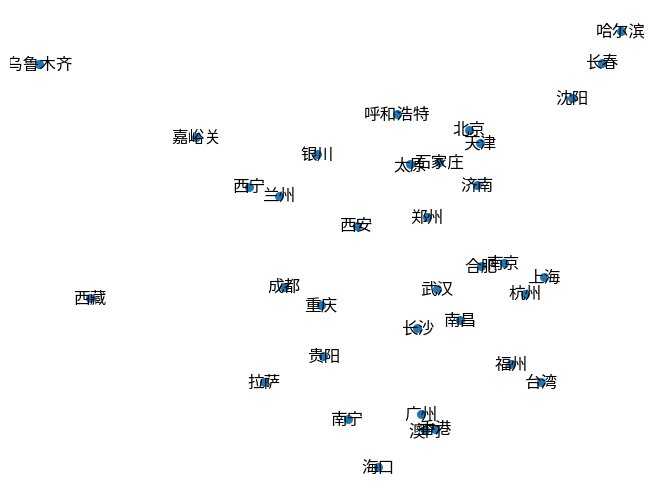

In [11]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [12]:
city_location.values()

dict_values([[103.73, 36.03], [98.17, 39.47], [101.74, 36.56], [104.06, 30.67], [114.48, 38.03], [102.73, 25.04], [106.71, 26.57], [114.31, 30.52], [113.65, 34.76], [117.0, 36.65], [118.78, 32.04], [117.27, 31.86], [120.19, 30.26], [115.89, 28.68], [119.3, 26.08], [113.23, 23.16], [113.0, 28.21], [110.35, 20.02], [123.38, 41.8], [125.35, 43.88], [126.63, 45.75], [112.53, 37.87], [108.95, 34.27], [121.3, 25.03], [116.46, 39.92], [121.48, 31.22], [106.54, 29.59], [117.2, 39.13], [111.65, 40.82], [108.33, 22.84], [91.11, 29.97], [106.27, 38.47], [87.68, 43.77], [114.17, 22.28], [113.54, 22.19]])

In [13]:
import numpy as np
import random

In [14]:
xs = np.array(list(city_location.values()))

In [15]:
xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

In [16]:
def get_random_ceneter(all_x, all_y):
    return random.uniform(min(all_x), max(all_x)), random.uniform(min(all_y), max(all_y))

In [17]:
all_x = xs[:,0]
all_y = xs[:,1]
K = 5
centers = {'{}'.format(i+1):get_random_ceneter(all_x,all_y) for i in range(K)}
the_first_center = {k: v for k, v in centers.items()}

In [18]:
centers

{'1': (97.81887649150032, 30.10922660907801),
 '2': (122.7241305544834, 20.624924235718417),
 '3': (94.83552594848715, 28.991151363974737),
 '4': (123.56469399349353, 21.244074452484398),
 '5': (87.69763315963169, 29.805605653374144)}

In [19]:
from collections import defaultdict

In [20]:
threshold = 5

In [21]:
changed = True
while changed:
    closet_points = defaultdict(list)
    for x,y in zip(all_x,all_y):
        closet_c,closet_dis = min([(k,geo_distance((x,y),centers[k])) for k in centers],key=lambda t:t[1])
        #print('for {},{} the closet centers is {},closet_dis:{}'.format(x,y,closet_c,closet_dis))
        closet_points[closet_c].append([x,y])
    #print(closet_points)
    changed = False
    for c in closet_points:
        former_center = centers[c]
        neighbors_belong_to_c = closet_points[c]
        neighbors_center = np.mean(neighbors_belong_to_c,axis=0)
        if geo_distance(neighbors_center,former_center) > threshold:
            print('Updated : {} center'.format(c))
            centers[c] = neighbors_center
            changed = True

Updated : 1 center
Updated : 4 center
Updated : 2 center
Updated : 5 center
Updated : 1 center
Updated : 5 center
Updated : 3 center
Updated : 2 center
Updated : 4 center
Updated : 1 center
Updated : 4 center
Updated : 2 center


In [22]:
centers

{'1': array([107.68      ,  35.44888889]),
 '2': array([113.64818182,  25.05272727]),
 '3': array([96.92 , 27.505]),
 '4': array([119.83818182,  37.32181818]),
 '5': array([92.925, 41.62 ])}

In [23]:
import matplotlib.pyplot as plt

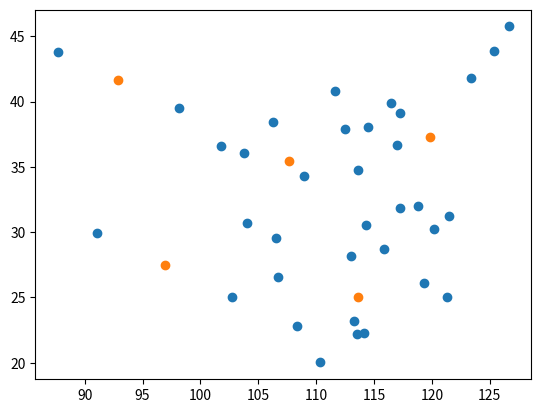

In [24]:
plt.scatter(*[all_x,all_y])
#plt.scatter([x for x, y in centers.values()], [y for x, y in centers.values()])
plt.scatter(*zip(*centers.values()))

In [25]:
centers.values()

dict_values([array([107.68      ,  35.44888889]), array([113.64818182,  25.05272727]), array([96.92 , 27.505]), array([119.83818182,  37.32181818]), array([92.925, 41.62 ])])

In [26]:
city_location_with_station = {
    '能源站:{}'.format(int(i)): position for i , position in centers.items()
}
city_location_with_station

{'能源站:1': array([107.68      ,  35.44888889]),
 '能源站:2': array([113.64818182,  25.05272727]),
 '能源站:3': array([96.92 , 27.505]),
 '能源站:4': array([119.83818182,  37.32181818]),
 '能源站:5': array([92.925, 41.62 ])}

In [27]:
def draw_cities(cities,color=None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph,cities,node_color=color,with_labels=True,node_size=50)

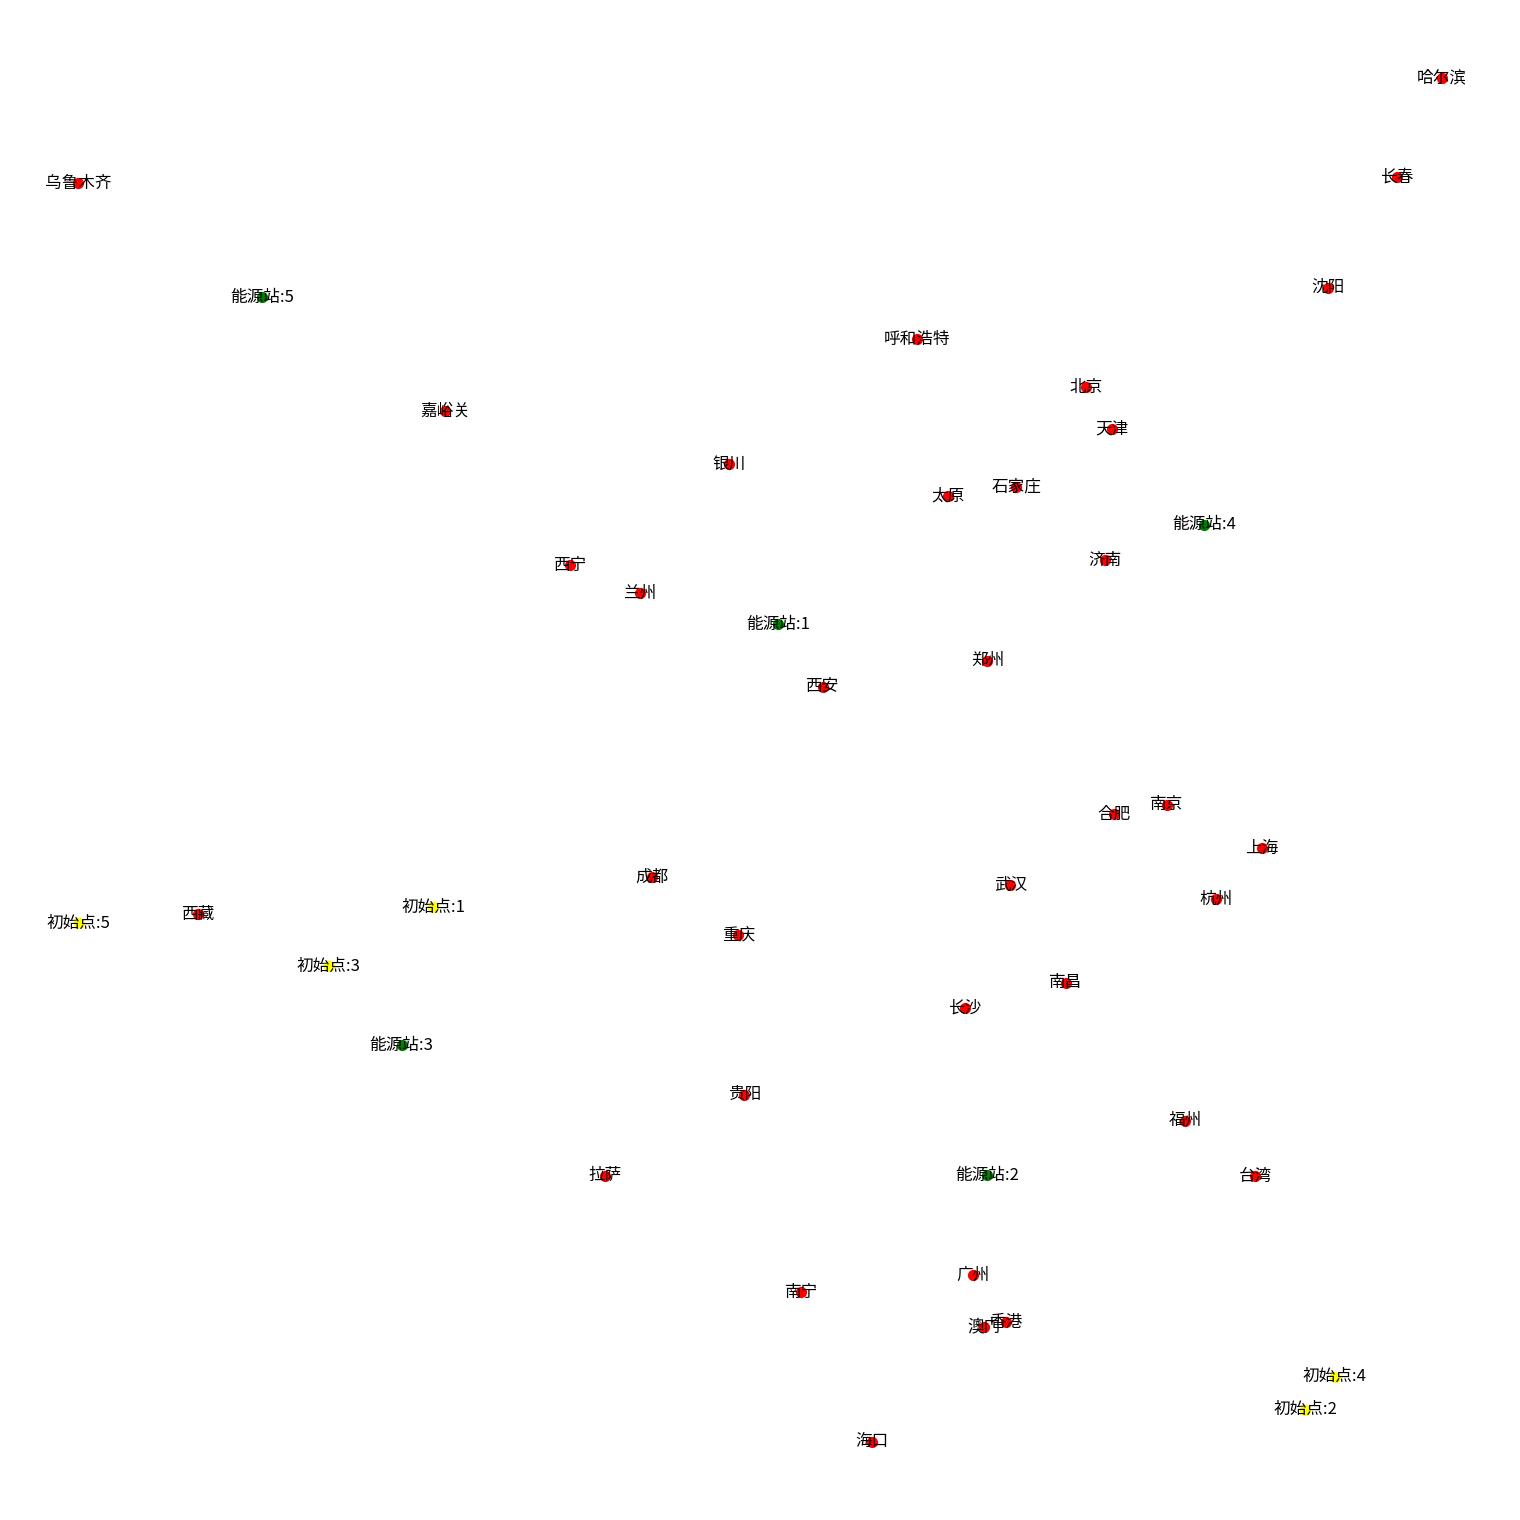

In [28]:
plt.figure(1, figsize=(15, 15))
draw_cities({'初始点:{}'.format(int(i)):p for i,p in the_first_center.items()},color='yellow')
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')

In [34]:
#!pip install scikit-learn

  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [35]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters=K, random_state=0,n_init='auto').fit(xs)

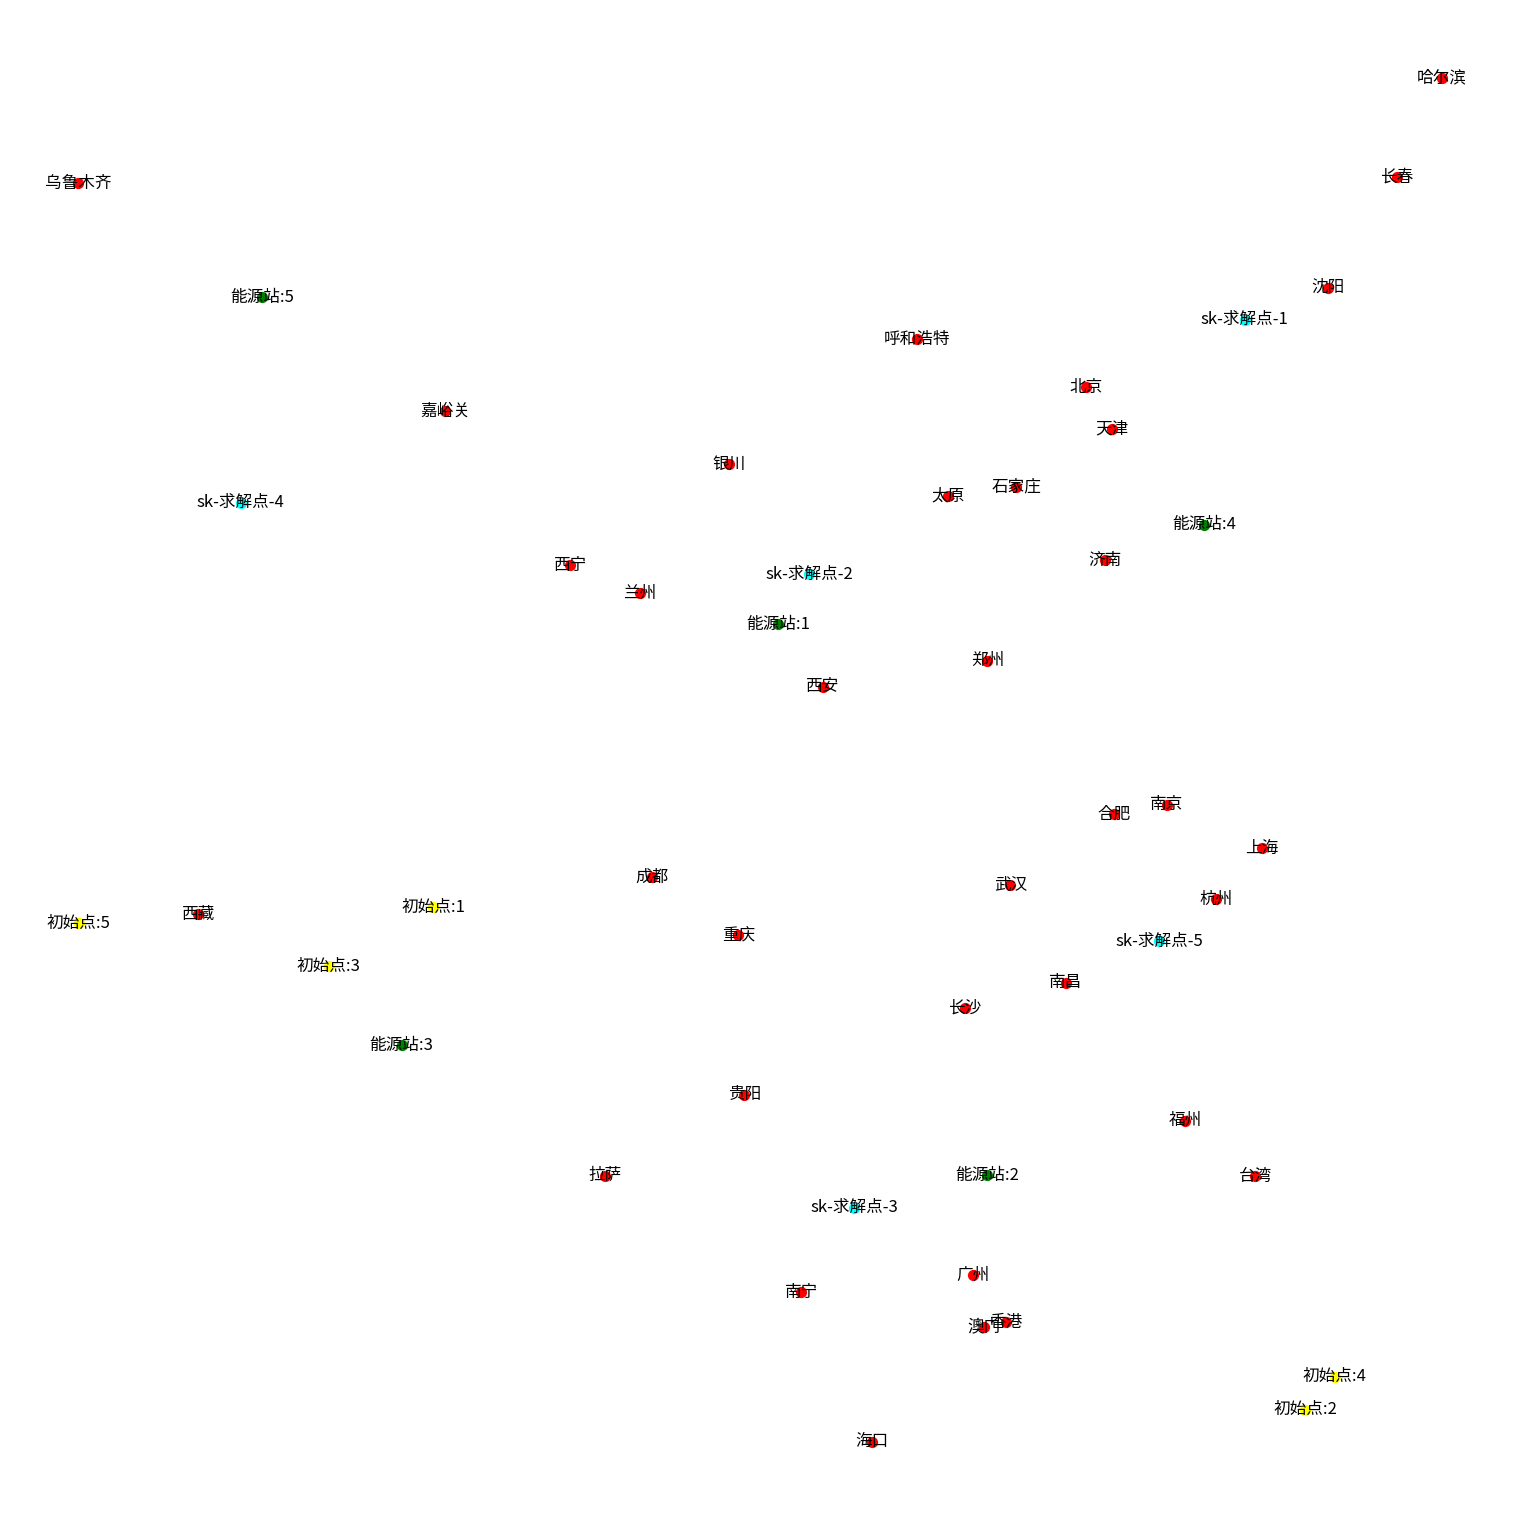

In [52]:
plt.figure(1, figsize=(15, 15))
draw_cities({'初始点:{}'.format(int(i)):p for i,p in the_first_center.items()},color='yellow')
draw_cities({'sk-求解点-{}'.format(int(i)+1): p for i, p in enumerate(kmeans.cluster_centers_)}, color='cyan')
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')